In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, \
'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, \
'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, \
'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, \
'id':str, 'sqft_lot':int, 'view':int}
data_house = pd.read_csv('kc_house_data.csv',dtype = dtype_dict)

In [7]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

In [14]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']


In [28]:
lm = smf.ols(formula='price~ power_1', data=poly1_data).fit()
print(lm.params)
simple_weights = lm.params

Intercept   -43580.743094
power_1        280.623568
dtype: float64


287555.06702451408

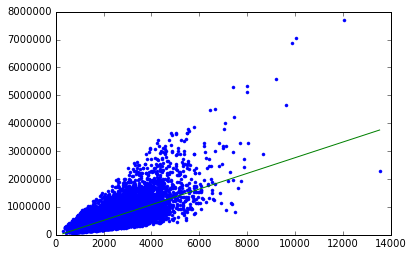

In [29]:
model_predict = simple_weights[0] + simple_weights[1]*sales['sqft_living']
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
poly1_data['power_1'],model_predict)

Intercept    4.535456e-118
power_15      3.739616e-56
dtype: float64
Intercept    8.940831e-113
power_15      2.096523e-53
dtype: float64
Intercept    8.640513e-114
power_15      7.415735e-54
dtype: float64
Intercept    6.814885e-111
power_15      1.447454e-52
dtype: float64


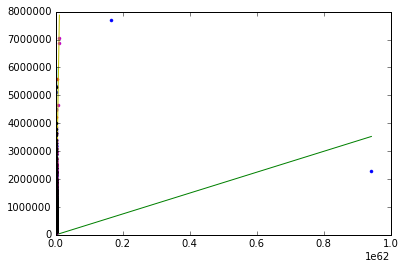

In [11]:
import pandas as pd
for i in range(1,5):
    name = 'wk3_kc_house_set_'+str(i)+'_data.csv'
    sales = pd.read_csv(name, dtype=dtype_dict)
    sales = sales.sort_values(['sqft_living','price'])
    poly2_data = polynomial_dataframe(sales['sqft_living'], 15)
    poly2_data['price'] = sales['price']
    lm = smf.ols(formula='price~ power_15', data=poly2_data).fit()
    print(lm.params)
    simple2_weights = lm.params
    plt.plot(poly2_data['power_15'],poly2_data['price'],'.',
    poly2_data['power_15'],lm.predict())

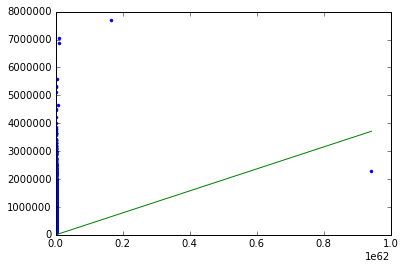

In [41]:

plt.plot(poly2_data['power_15'],poly2_data['price'],'.',
poly2_data['power_15'],model_predict)

In [16]:
def get_residual_sum_of_squares(input_feature, output, intercept,slope):
    RSS_R = (output - np.dot(input_feature, slope) - intercept)
    RSS_L = np.transpose(RSS_R)
    RSS = np.dot(RSS_L,RSS_R)
    return(RSS)

In [31]:
import statsmodels.api as sm

Y = [1,3,4,5,2,3,4]
X = range(1,8)
X = sm.add_constant(X)
model = sm.OLS(Y,X)

power_x = 'price~'
for i in range(1,16):
    sales = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
    #sales = sales.sort_values(['sqft_living','price'])
    poly_data = polynomial_dataframe(sales['sqft_living'], i)
    poly_data = sm.add_constant(poly_data)
    model = sm.OLS(sales['price'],poly_data)
    results = model.fit()
    weights = results.params
    del poly_data['const']
    sales1 = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)
    #sales = sales.sort_values(['sqft_living','price'])
    poly_data = polynomial_dataframe(sales1['sqft_living'], i)
    input_feature = poly_data
    output = sales1['price']
    intercept = weights[0]
    slope = weights[1:]
    RSS = sum((output - np.dot(input_feature, slope) - intercept)**2)
    #rss = get_residual_sum_of_squares(input_feature, output, intercept,slope)
    print(RSS)
    print(i)

6.28574009789e+14
1
6.22558430664e+14
2
6.8085679718e+14
3
6.07712194813e+14
4
6.35113371103e+14
5
1.77769935224e+15
6
1.0074411118e+16
7
4.85069464076e+16
8
2.18367210341e+17
9
9.45833457669e+17
10
2.10642914696e+17
11
5.24189112218e+17
12
1.42031560039e+18
13
4.02649551223e+18
14
1.16529985814e+19
15


In [23]:
sales = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])
poly_data = polynomial_dataframe(sales['sqft_living'], 1)
poly_data = sm.add_constant(poly_data)
model = sm.OLS(sales['price'],poly_data)
results = model.fit()
weights = results.params
sales = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])
poly_data = polynomial_dataframe(sales['sqft_living'], 1)
input_feature = poly_data
output = sales['price']
intercept = weights[0]
slope = weights[1:]
#get_residual_sum_of_squares(input_feature, output, intercept,slope)/1e14
sum((output - np.dot(input_feature, slope) - intercept)**2)/1e14

1.4234793135863872

In [32]:
sales = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
#sales = sales.sort_values(['sqft_living','price'])
poly_data = polynomial_dataframe(sales['sqft_living'], 2)
poly_data = sm.add_constant(poly_data)
poly_data

,const,power_1,power_2
0,1,1960.0,3841600.0
1,1,5420.0,29376400.0
2,1,1160.0,1345600.0
3,1,1430.0,2044900.0
4,1,1370.0,1876900.0
5,1,2950.0,8702500.0
6,1,1600.0,2560000.0
7,1,1620.0,2624400.0
8,1,2270.0,5152900.0
9,1,1070.0,1144900.0
